# Imports

In [17]:
from PIL import Image
import numpy as np
import glob
import matplotlib.pyplot as plt

# Load images

In [7]:
image_list = []
datay_train = []

letters = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]
for letter in letters:
    count = 0
    print(letter)
    for file in glob.glob("./Images/train/"+ letter+"/*.png"):
        im=Image.open(file)
        im2 = im.resize((150, 150))
        image_list.append(np.array(im2))
        im.close()
        im2.close()
        count += 1
    aux = np.full(count, letter)
    datay_train.append(aux)
datay_train = np.concatenate(datay_train)

A
B
C
D
E
F
G
H
I
J
K
L
M
N
O
P
Q
R
S
T
U
V
W
X
Y
Z


In [8]:
image_list_test = []
datay_test = []

letters = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]
for letter in letters:
    count = 0
    print(letter)
    for file in glob.glob("./Images/test/"+ letter+"/*.png"):
        im=Image.open(file)
        im2 = im.resize((150, 150))
        image_list_test.append(np.array(im2))
        im.close()
        im2.close()
        count += 1
    aux = np.full(count, letter)
    datay_test.append(aux)
datay_test = np.concatenate(datay_test)

A
B
C
D
E
F
G
H
I
J
K
L
M
N
O
P
Q
R
S
T
U
V
W
X
Y
Z


In [9]:
image_list2 = np.array(image_list)
image_list_test2 = np.array(image_list_test)

In [10]:
image_list2 = image_list2.reshape(image_list2.shape[0], image_list2.shape[1], image_list2.shape[2], 1)
image_list_test2 = image_list_test2.reshape(image_list_test2.shape[0], image_list_test2.shape[1], image_list_test2.shape[2], 1)

This changes to datay are needed for the neural network

In [12]:
aux, counts = np.unique(datay_train, return_counts=True)
datay2 = []
for i in datay_train:
    datay2.append(np.where(aux == i, 1, 0))
    
datay2 = np.array(datay2)
datay2.shape

(43121, 26)

In [13]:
aux, counts = np.unique(datay_test, return_counts=True)
datay_test2 = []
for i in datay_test:
    datay_test2.append(np.where(aux == i, 1, 0))
    
datay_test2 = np.array(datay_test2)
datay_test2.shape

(43121, 26)

Saving the data, to execute the neural network in Google Colab

In [6]:
np.save("results/xtrain.npy", image_list2)
np.save("results/ytrain.npy", datay2)

# PCA

# Neural Network

In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D,MaxPooling2D,Flatten, Softmax
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Conv2D(8,kernel_size = (3,3),padding = 'same',input_shape = (image_list2.shape[1], image_list2.shape[2], 1, )))
model.add(Conv2D(8,kernel_size = (3,3),padding = 'same'))
model.add(MaxPooling2D())
model.add(Conv2D(16,kernel_size = (3,3),padding = 'same'))
model.add(Conv2D(16,kernel_size = (3,3),padding = 'same'))
model.add(MaxPooling2D())
model.add(Conv2D(32,kernel_size = (3,3),padding = 'same'))
model.add(Conv2D(32,kernel_size = (3,3),padding = 'same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(32))
model.add(Dense(26, activation = 'softmax'))

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy')

In [ ]:
model.summary()

In [ ]:
model.fit(image_list2, datay2)

In [ ]:
model.predict(image_list2, datay2)

In [ ]:
model.predict(image_list_test2, datay_test2)

In [24]:
model.export("./")

INFO:tensorflow:Assets written to: ./assets


INFO:tensorflow:Assets written to: ./assets


Saved artifact at './'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 1), dtype=tf.float32, name='conv2d_input')
Output Type:
  TensorSpec(shape=(None, 26), dtype=tf.float32, name=None)
Captures:
  2176579617616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2176579618768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2176579618384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2176579619344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2176579619920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2176579618192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2176579618960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2176579617808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2176579621456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2176579621264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2176579622416: TensorSpec(shape=(), dtype=tf.re

In [7]:
from sklearn.decomposition import PCA
image_list3 = image_list2.reshape(image_list2.shape[0], image_list2.shape[1]*image_list2.shape[2])

pca = PCA(n_components=10)
data = pca.fit_transform(image_list3)

print(data)

[[ -938.20445344  4516.69157011   993.14458409 ...  2955.43045703
  -3035.06307469  -990.34404092]
 [-5599.63635013  1174.49550661  -262.48113606 ...   329.05650515
   -941.56713051   351.7096908 ]
 [-1493.46757711  3339.35535458  -410.50805351 ...  3020.64437418
  -2041.79547839  -839.06160461]
 ...
 [-1293.47011585  -818.03553797  3844.66157564 ...   130.05057743
  -1812.48683987 -2434.9180825 ]
 [-1560.66044099  1307.19768567  -365.27320446 ...  -282.52997604
  -1531.98514331 -2781.56036916]
 [-2539.9509031  -1326.98664825  3512.40230993 ...   753.21237527
  -2611.03866221 -2229.41184438]]


In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)

lr.fit(data, datay)
lr.score(data, datay)

0.6935599823751768

# Neural Network results

Load if you executed in Google Colab

In [13]:
test = np.load("./results/ytestpred.npy")
train = np.load("./results/ytrainpred.npy")

In [14]:
aux = np.unique(datay_test) # this gets a list of A, B, C...
aux

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype='<U1')

Calculate the mean of the results according to the actual solution 

In [15]:
dict = {}
dictcount = {}
for i, j in zip(test, datay_test):
    try:
        dict[j] += np.array(i)
        dictcount[j] += 1
    except:
        dict[j] = np.array(i)
        dictcount[j] = 1

for key in dict.keys():
    dict[key] = dict[key]/dictcount[key]

dict

{'A': array([8.3669233e-01, 5.8805775e-03, 2.2347274e-03, 1.9073432e-03,
        4.8100972e-03, 2.1068731e-02, 8.6078001e-03, 2.3120360e-02,
        4.1982061e-03, 1.6131219e-03, 1.6150257e-03, 3.5030707e-03,
        1.1149058e-02, 7.4332869e-03, 5.4129148e-03, 9.9643217e-03,
        2.6334766e-03, 2.5913596e-02, 2.6469077e-03, 3.8974015e-03,
        1.7753036e-03, 7.5593236e-04, 8.7436871e-04, 5.6737885e-03,
        3.2604530e-03, 3.3588144e-03], dtype=float32),
 'B': array([0.01954182, 0.7791909 , 0.0098949 , 0.01598956, 0.02225497,
        0.01032692, 0.00539777, 0.00376668, 0.0164278 , 0.00117396,
        0.00269453, 0.00449683, 0.00498586, 0.00441925, 0.0157119 ,
        0.00201634, 0.00279283, 0.03096922, 0.01973839, 0.00125093,
        0.00304252, 0.00151483, 0.00139682, 0.00113261, 0.00267952,
        0.01719202], dtype=float32),
 'C': array([1.5269868e-03, 3.9995825e-03, 8.6215991e-01, 9.0750103e-04,
        1.0878454e-02, 3.5099348e-03, 7.8957230e-03, 1.0145473e-03,
        6

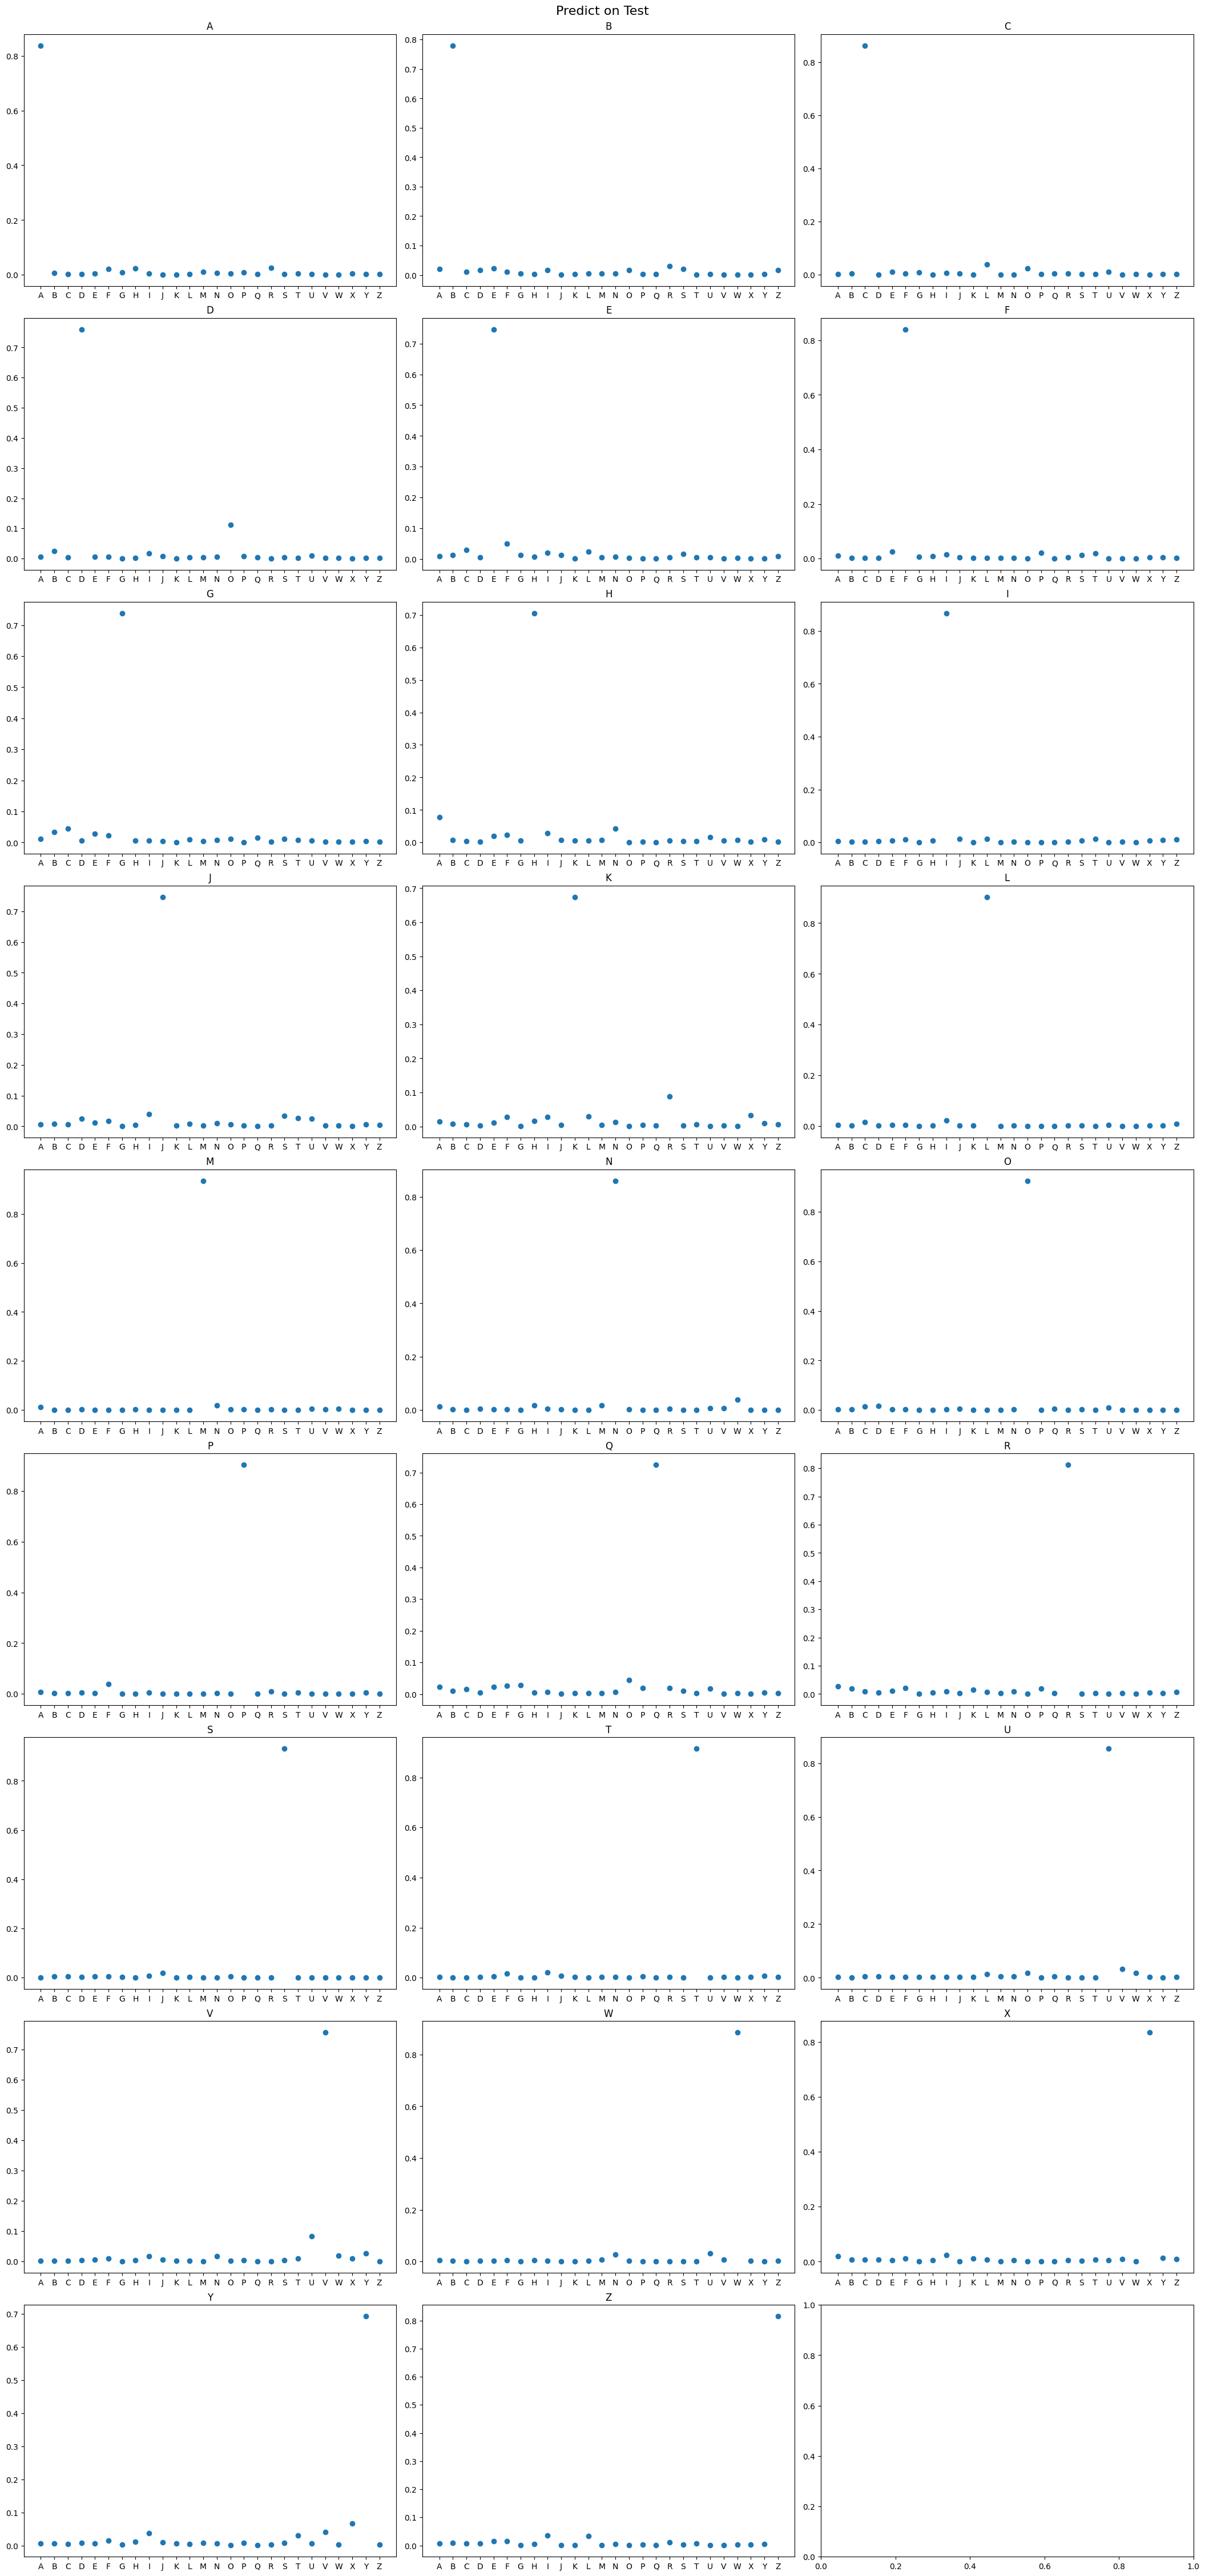

In [37]:
fig, axs = plt.subplots(9, 3, figsize = (21, 5*9), constrained_layout=True)
fig.suptitle("Predict on Test", fontsize=16)

for idx, i in enumerate(dict.items()):
    axs[idx//3][idx%3].scatter(aux, i[1])
    axs[idx//3][idx%3].set_title(i[0])



In [38]:
dict2 = {}
dictcount2 = {}
for i, j in zip(train, datay_train):
    try:
        dict2[j] += np.array(i)
        dictcount2[j] += 1
    except:
        dict2[j] = np.array(i)
        dictcount2[j] = 1

for key in dict2.keys():
    dict2[key] = dict2[key]/dictcount2[key]

dict2

{'A': array([9.6595961e-01, 5.4481803e-03, 1.8698386e-03, 1.4245127e-03,
        2.8810073e-03, 4.9652029e-03, 9.8414067e-04, 2.0536573e-03,
        1.3139864e-03, 3.7947955e-04, 2.6584865e-04, 8.6651777e-04,
        7.7217317e-04, 2.1013760e-03, 4.6635489e-04, 5.7087123e-04,
        3.0424891e-04, 2.0638055e-03, 6.7680090e-04, 7.2406535e-04,
        2.4476257e-04, 3.2791164e-04, 6.0561486e-04, 8.0084265e-04,
        1.0443043e-03, 8.8930520e-04], dtype=float32),
 'B': array([1.1170787e-02, 9.5427537e-01, 2.5526332e-03, 2.2836393e-03,
        3.3108010e-03, 4.5837360e-03, 6.1077537e-04, 2.2453929e-03,
        2.7852259e-03, 1.2610652e-03, 2.7515608e-04, 1.6720644e-03,
        6.9789879e-04, 1.9775154e-03, 9.1468939e-04, 4.0381440e-04,
        2.9376784e-04, 2.2443167e-03, 8.3579286e-04, 6.8051269e-04,
        2.6441528e-04, 4.0931391e-04, 6.2041468e-04, 6.5467239e-04,
        1.3417411e-03, 1.6383262e-03], dtype=float32),
 'C': array([4.9404437e-03, 4.9796198e-03, 9.5574123e-01, 1.0447

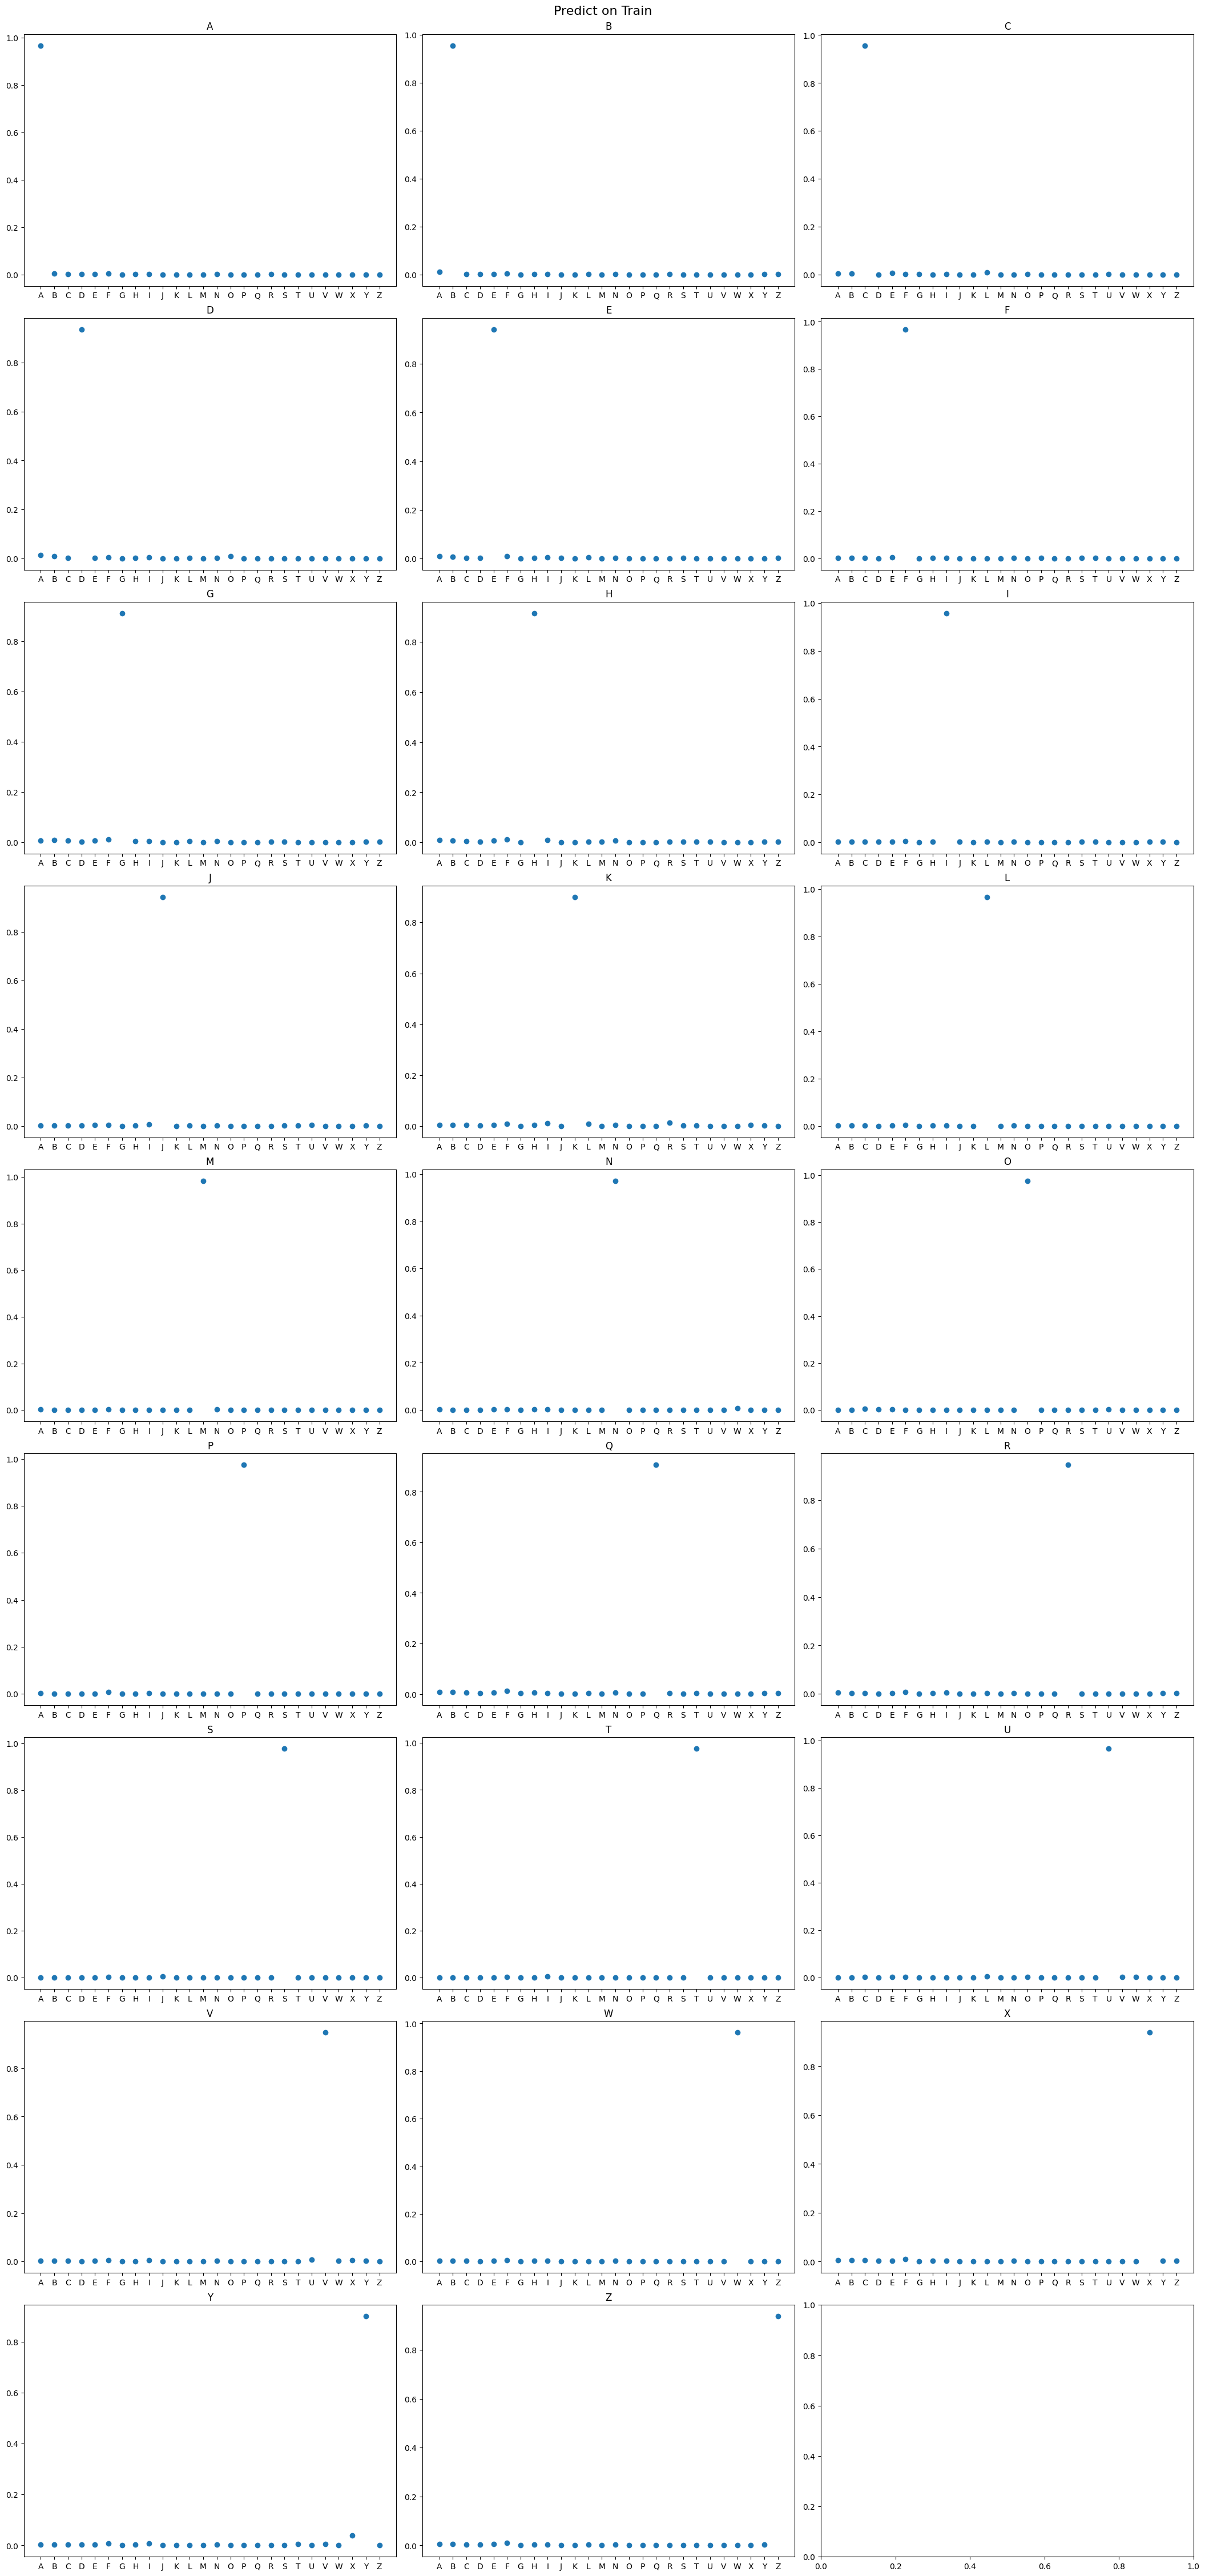

In [40]:
fig, axs = plt.subplots(9, 3, figsize = (21, 5*9), constrained_layout=True)
fig.suptitle("Predict on Train", fontsize=16)

for idx, i in enumerate(dict2.items()):
    axs[idx//3][idx%3].scatter(aux, i[1])
    axs[idx//3][idx%3].set_title(i[0])


In [34]:
import keras
model = tf.keras.saving.load_model("model.keras")

ValueError: Layer 'conv2d' expected 2 variables, but received 0 variables during loading. Expected: ['conv2d/kernel:0', 'conv2d/bias:0']

In [36]:
keras.__version__

'2.14.0'